### Exploratoy Data Analysis...

* Understand the Problem Statement
* Univariate Analysis (Single Variable)
* Bivariate/Multivariate Analysis (Two or More Variable)
* Missing Values
* Outlier Analysis 
* **Feature Engineering**
* Data PreProcessing Step - Scaling and Transformation

In [4]:
# Import the Required Libraries...
import numpy as np
import pandas as pd

# Visualization...
import matplotlib.pyplot as plt
import seaborn as sns

# warnings...
import warnings
warnings.filterwarnings("ignore")

# dataframe view..
pd.set_option('display.max_columns', 50)

In [5]:
# train and test...
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [6]:
# Preview the Data...
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Shape of the Data
train.shape, test.shape

((8523, 12), (5681, 11))

In [8]:
# Combine the Data
combined = pd.concat([train, test], ignore_index = True)

In [9]:
combined.shape

(14204, 12)

### Univariate Analysis

* It means analysing the data single handedly. In other words, take each and every column and analyse it.

* Now, the data has two types of columns - Numerical & Categorical.

* In **Numerical Data**, the way to analyse the data is to create a **Histogram or a Distplot...**

* In Case of Categorical Data, we can create **Frequency Plot** which is known as **Countplot** in python...

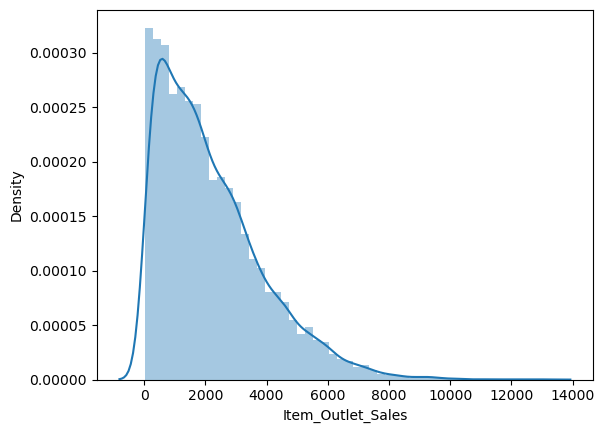

In [10]:
# Sales...
sns.distplot(combined.Item_Outlet_Sales)
plt.show()

In [11]:
# Mean, Median and Mode
combined.Item_Outlet_Sales.describe()

# return the 5 Point Summary Statistics of the Data...

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [12]:
combined.Item_Outlet_Sales.mode()

0    958.752
Name: Item_Outlet_Sales, dtype: float64

In [13]:
# Skewness
combined.Item_Outlet_Sales.skew()

1.1775306028542796

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
# Pull the Numerical Columns
num_cols = combined.select_dtypes(include = np.number).columns

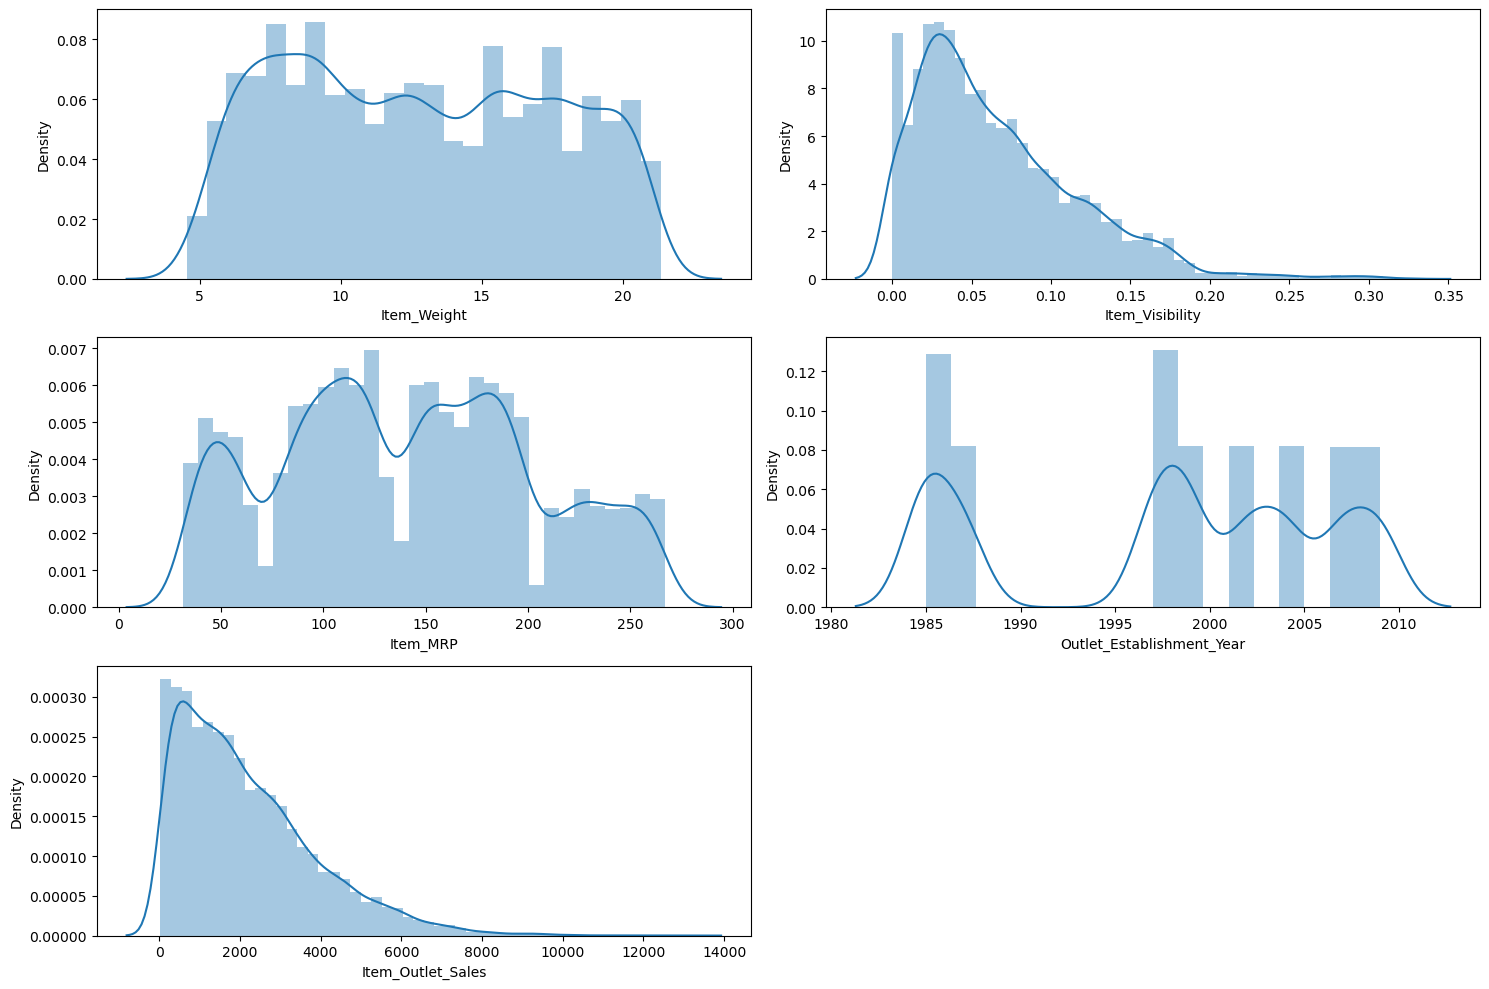

In [16]:
nrows = 3
ncols = 2
repeater = 1
plt.figure(figsize=(15, 10))

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:, i])
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

In [17]:
# Cat Vars...
combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

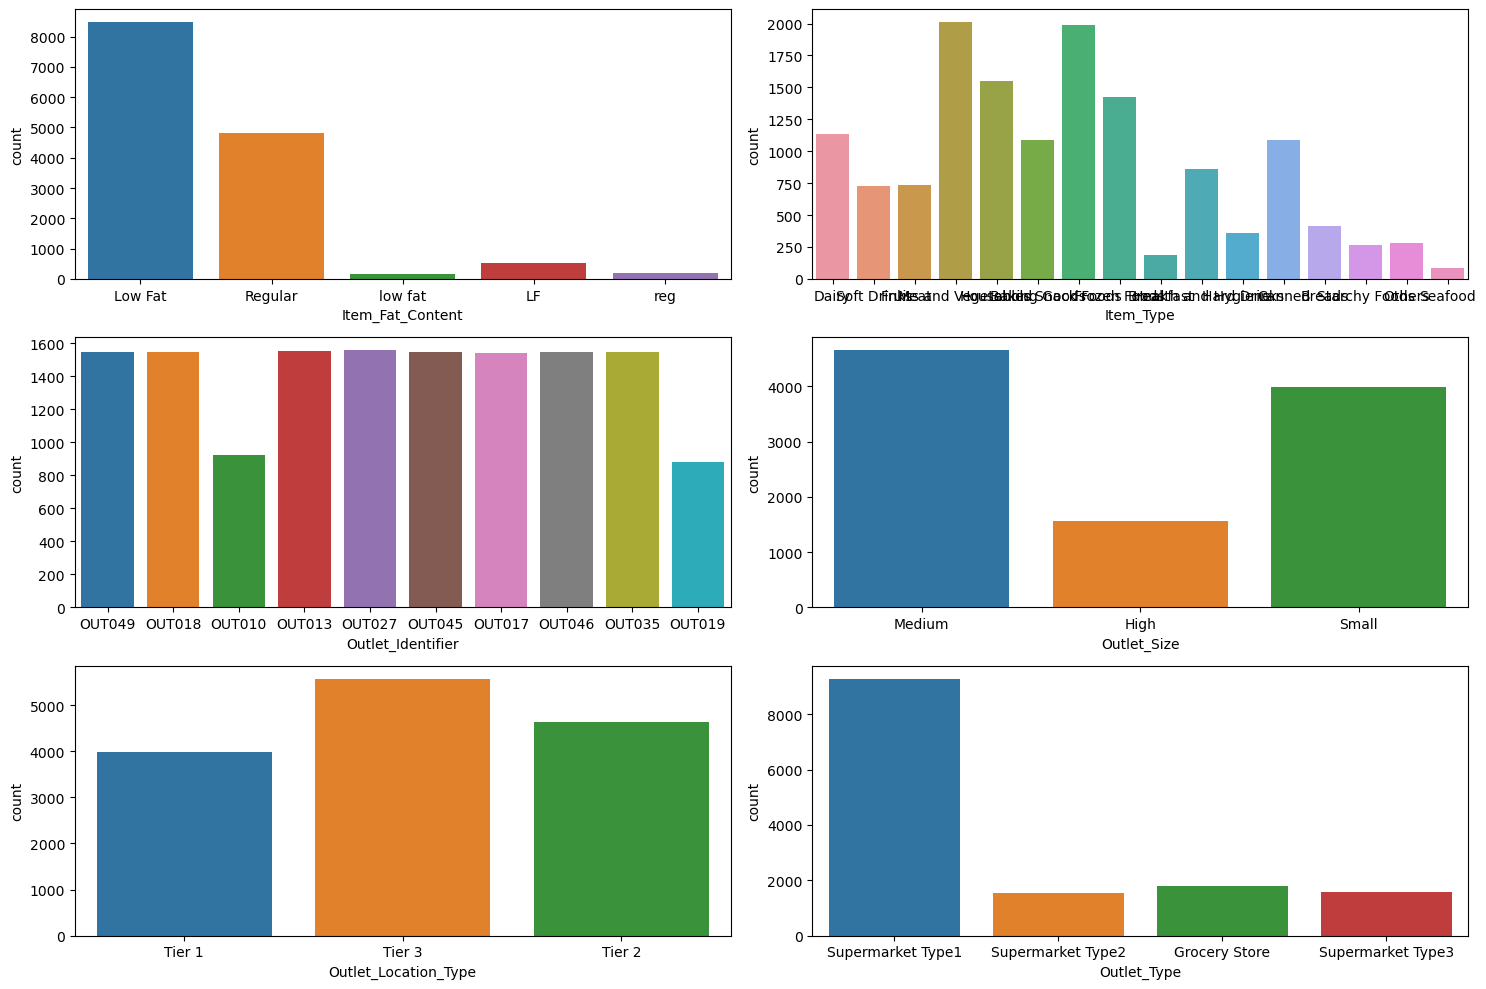

In [19]:
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize= (15, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    iterator+=1
    
plt.tight_layout()
plt.show()

### Bivariate Analysis

* Num vs Num (Target Variable) ~ **Scatterplot**
* Cat vs Num (tgt var) ~ **Boxplot** & **ViolinPlot**
* Cat vs Cat (Tgt Var) ~ **pd.crosstab(Freq Table) & Countplot**

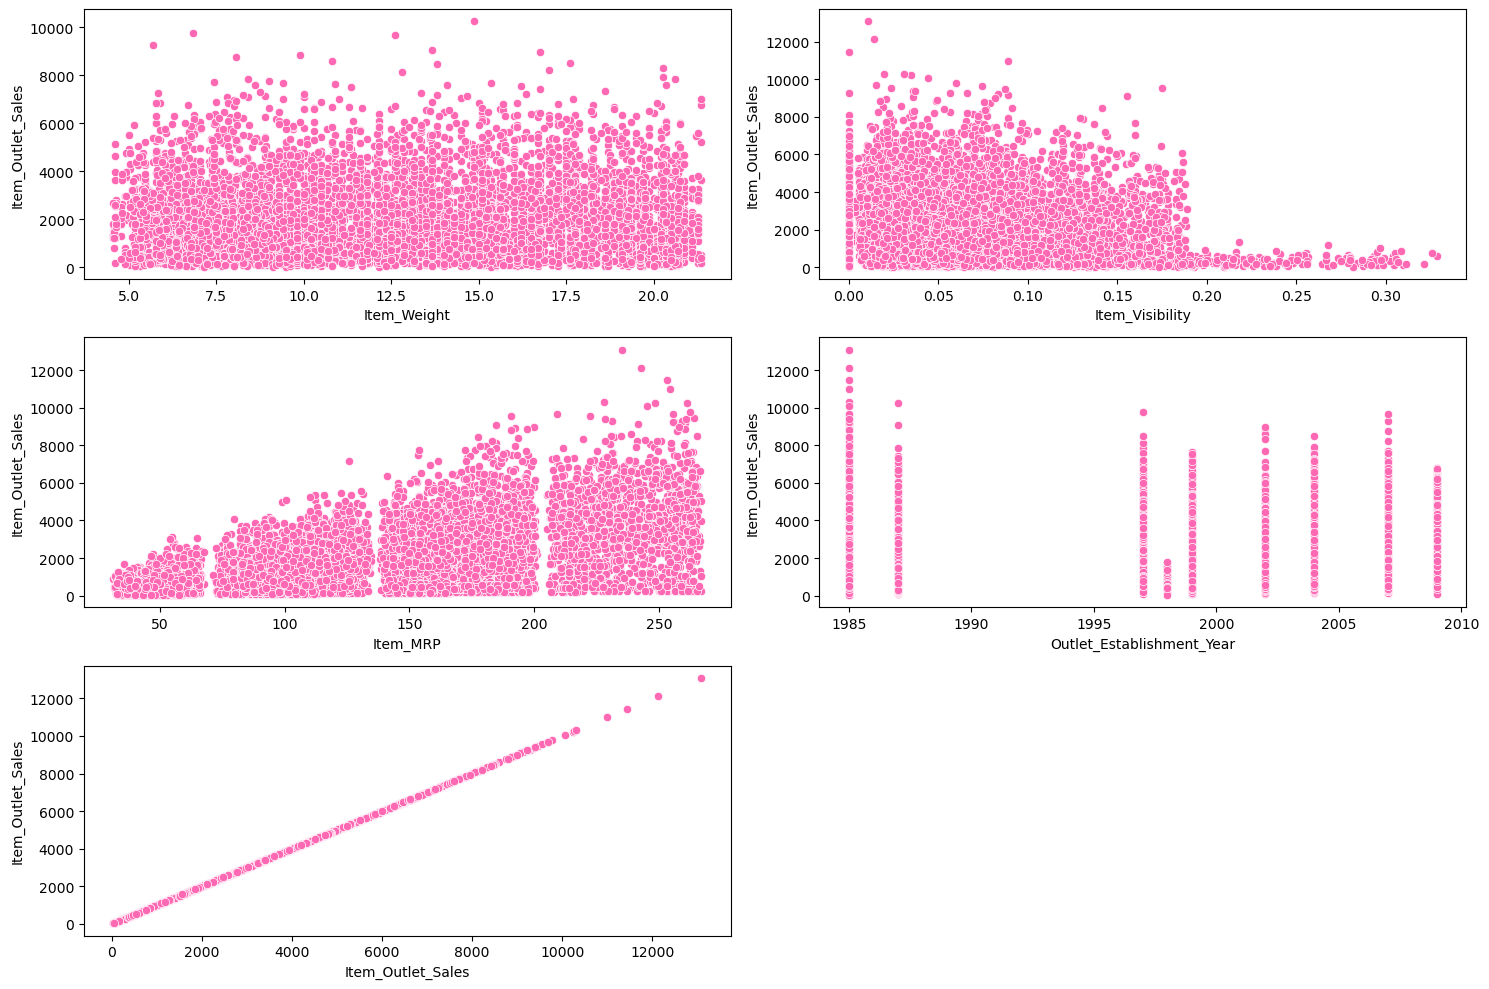

In [20]:
# Num vs Num
nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize=(15, 10))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:, i], combined.Item_Outlet_Sales,
                   color = "hotpink")
    iterator+=1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

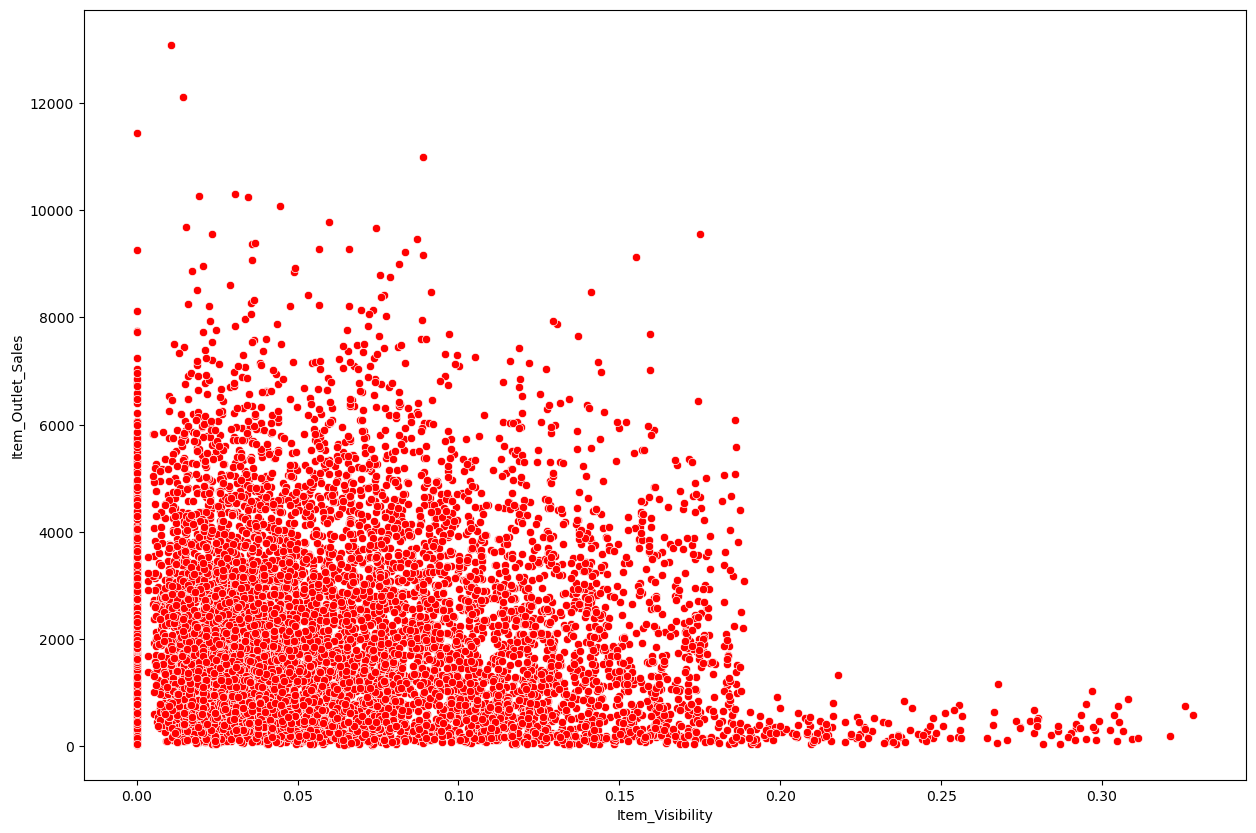

In [21]:
#$ Item Visibility vs Sales
plt.figure(figsize=(15, 10))
sns.scatterplot(combined["Item_Visibility"], 
                                 combined["Item_Outlet_Sales"],
               color = "red")

In [22]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


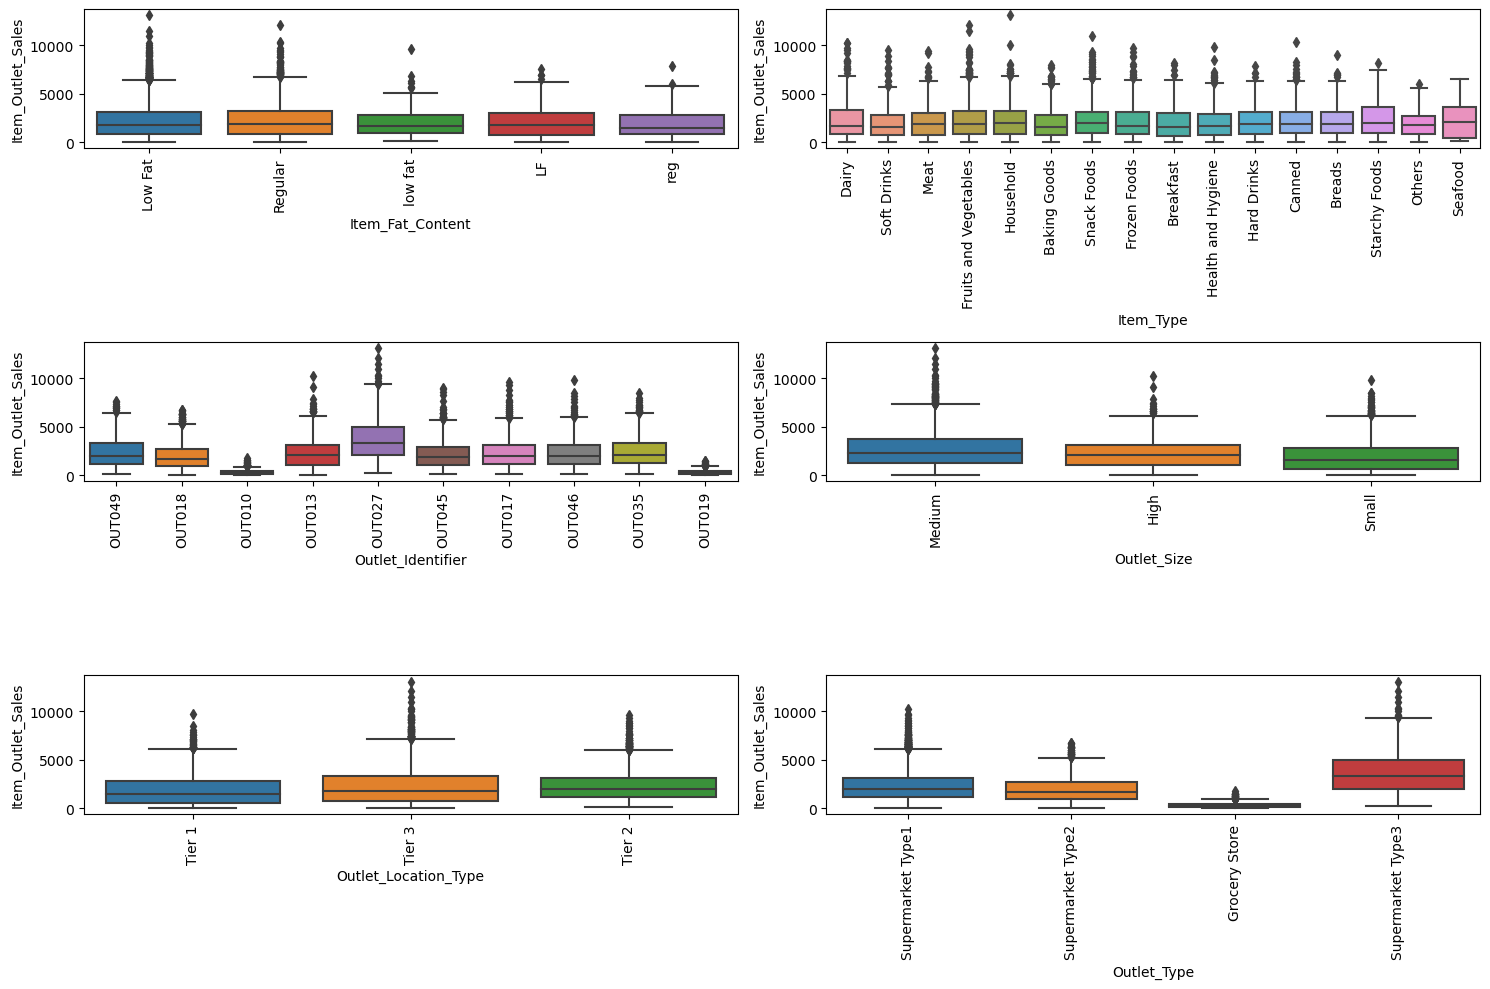

In [23]:
# Cat vs Num (Sales)
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize = (15, 10))

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], 
                combined.loc[:, "Item_Outlet_Sales"])
    iterator+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

In [24]:
# Fix the Item Fat Content
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
combined.Item_Fat_Content.replace(to_replace = ["low fat", 
                                               "LF", "reg"],
                                 value = ["Low Fat", "Low Fat",
                                         "Regular"],
                                 inplace = True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

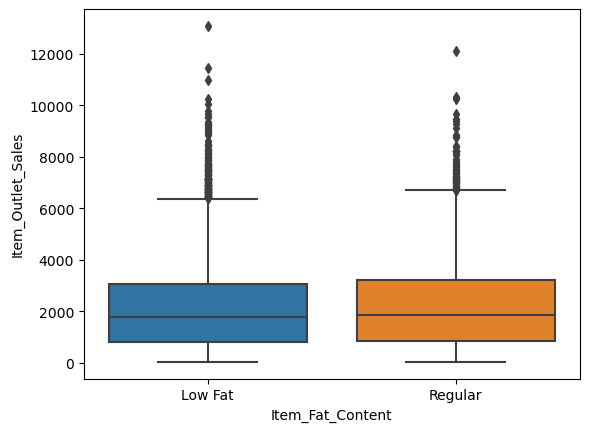

In [26]:
sns.boxplot(combined.Item_Fat_Content, 
           combined.Item_Outlet_Sales)

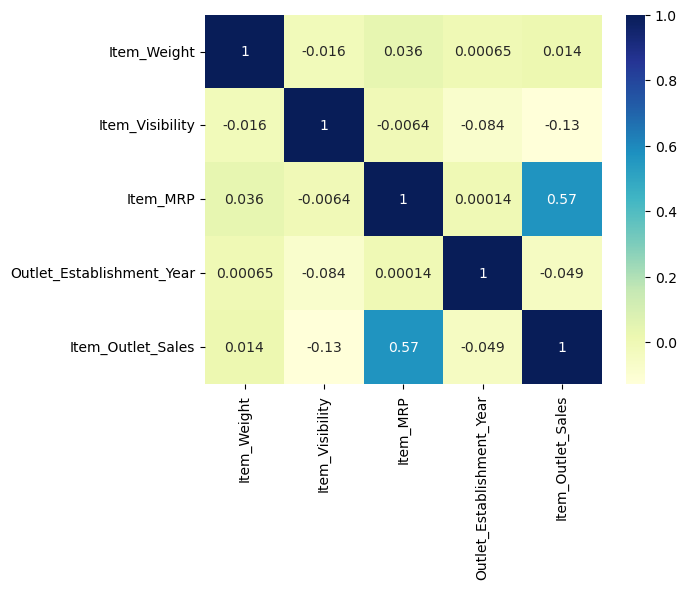

In [27]:
# Correlation between Numerical Vars...
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True,
           cmap = 'YlGnBu')
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

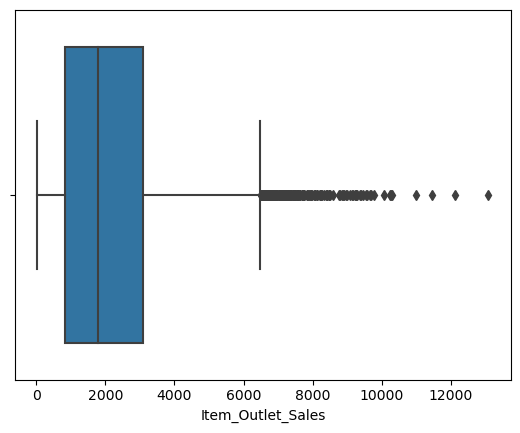

In [28]:
sns.boxplot(combined.Item_Outlet_Sales)

### Summary

* While dealing with the missing values, we need to make sure that we impute the data with the median. Although there is no constraint on not using the mean value, however, median appears to be more promising while dealing with missing values.

#### Understanding the Outliers using Boxplot & Gaussian Curve

* That the presence of Outliers is defined by the Extreme Values that appear on the upper side of the Boxplot or on the lower end of the Boxplot.

* If there is presence of Outlier in the data, then  it can identified using **Q3+1.5 * IQR** method. It means that **any value which is greater than  Q3+1.5 * IQR will be considered to be an Outlier.

* Similarly on the Lower End, **any value which is less than Q1 - 1.5 * IQR will be considered to be an outlier (inliers)**

* In Normal Distribution, the same outlier can be identifier as a **value that is greater than 3 Sigma**

In [29]:
# Removing Outliers from the Item Outlet Sales...
# Q1 (0.25)
q1 = combined.Item_Outlet_Sales.quantile(0.25)
#Q3 (0.75)
q3 = combined.Item_Outlet_Sales.quantile(0.75)
IQR = q3 - q1
print(f"Quantile1: {q1}")
print(f"Quantile3: {q3}")
print(f"IQR: {IQR}")

Quantile1: 834.2474
Quantile3: 3101.2964
IQR: 2267.049


In [30]:
# Calculate the Range Limits
upper_range = q3+1.5*IQR
lower_range = q1-1.5*IQR

print("Upper Range: ", upper_range)
print("Lower Range: ", lower_range)

Upper Range:  6501.8699
Lower Range:  -2566.3261


In [31]:
# Code for removing the Outliers....

wt_outlier = combined.loc[~((combined.Item_Outlet_Sales>upper_range)|\
             (combined.Item_Outlet_Sales<lower_range))]

In [32]:
wt_outlier.Item_Outlet_Sales.describe()

count    8337.000000
mean     2059.362844
std      1506.099754
min        33.290000
25%       810.944400
50%      1747.059200
75%      2998.097400
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales'>

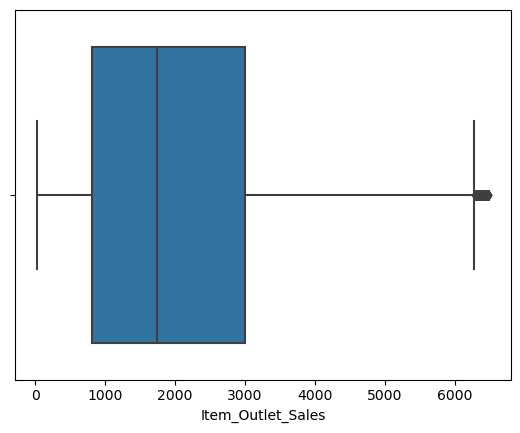

In [33]:
# Create the Boxplot
sns.boxplot(wt_outlier.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

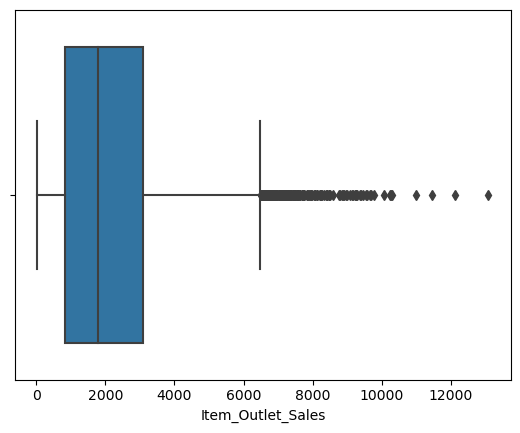

In [34]:
sns.boxplot(combined.Item_Outlet_Sales)

### Outlier Removal using Z Score

In [35]:
# Calculate the Z score for the TargetVar..
mew = combined.Item_Outlet_Sales.mean()
sigma = combined.Item_Outlet_Sales.std()

zscore = (combined.Item_Outlet_Sales - mew)/sigma

print(zscore.describe())

count    8.523000e+03
mean    -2.509302e-15
std      1.000000e+00
min     -1.258716e+00
25%     -7.893594e-01
50%     -2.267553e-01
75%      5.391197e-01
max      6.390670e+00
Name: Item_Outlet_Sales, dtype: float64


In [36]:
# Save the Zscore in theData
combined["zscore"] = zscore

In [37]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,zscore
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.910548
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-1.018381
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-0.049235
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,-0.849053
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,-0.695332


In [38]:
# Eliminate the Outliers using Zscore....
wt_outlier_using_zscore = \
combined[~((combined.zscore>3)|(combined.zscore<-3))]

### Missing Values

In [39]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
zscore               5681
dtype: int64

In [40]:
# Preview the Data where the Item Weight is Missing 

miss = combined.loc[combined.Item_Weight.isnull()]

In [41]:
miss.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,zscore
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1.079095
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,0.071714
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,1.103284
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,-1.152594
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,-1.204485


In [42]:
combined.loc[combined.Item_Identifier == "FDW12", \
             "Item_Weight"].median()

8.315

In [44]:
# combined.loc[7, "Item_Weight"]=val

In [45]:
# Find the List of Rows with Missing values
row_index = miss.index
item_ids = miss.Item_Identifier

In [46]:
for i in row_index:
    combined.loc[i, "Item_Weight"] = \
    combined.loc[combined.Item_Identifier == item_ids[i],\
                       "Item_Weight"].median()

In [47]:
# combined.loc[7, "Item_Weight"]=\
# combined.loc[combined.Item_Identifier == "FDW12", 
#"Item_Weight"].median()
for i in row_index:
    combined.loc[i, "Item_Weight"] = combined.loc[combined.Item_Identifier==item_ids[i], 
                       "Item_Weight"].median()

In [48]:
# Item Visibility
visible = combined.loc[combined.Item_Visibility==0]
visible.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,zscore
3,FDX07,19.20,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,-0.849053
4,NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,-0.695332


In [49]:
# combined.loc[3, "Item_Visibility"]=\
# combined.loc[combined.Item_Identifier=="FDX07", 
#              "Item_Visibility"].median()

In [50]:
row_nums = visible.index # row numbers for which we have to replace 0
visible_ids = visible.Item_Identifier

In [51]:
# combined.loc[3, "Item_Visibility"]=\
# combined.loc[combined.Item_Identifier=="FDX07", 
#              "Item_Visibility"].median()

for i in row_nums:
    combined.loc[i, "Item_Visibility"] = \
    combined.loc[combined.Item_Identifier==visible_ids[i],
                "Item_Visibility"].median()

In [52]:
# Impute the Value from Fruits and Veggies
val = combined.loc[(combined.Item_Type=="Fruits and Vegetables"),
             "Item_Visibility"].median()

In [53]:
combined.loc[combined.Item_Identifier=="FDY07", 
            "Item_Visibility"] = val

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

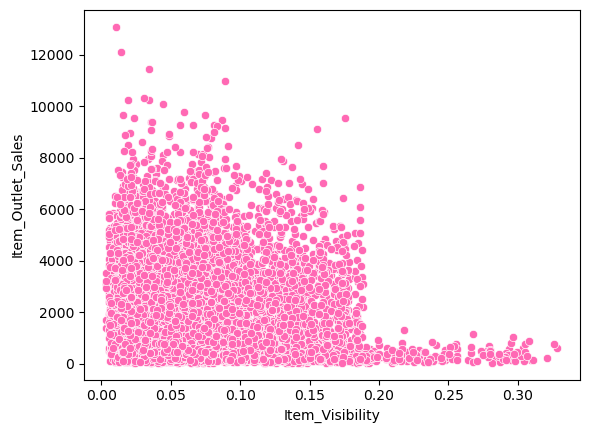

In [54]:
# plot the visibility...
sns.scatterplot(combined.Item_Visibility, 
               combined.Item_Outlet_Sales, 
                color = "hotpink")

In [55]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
zscore               5681
dtype: int64

In [56]:
# Find the Mode of the Outlet Size
combined.Outlet_Size.mode()[0]

'Medium'

In [57]:
combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

So, now I know that I cannot impute Medium here because the Outlets for which the Size is missing is not Out027.

I also know one thing that OUT010 is A LOW PERFORMING OUTLET...

In [58]:
combined.loc[combined.Outlet_Size.isnull()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,zscore
3,FDX07,19.2,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,-0.849053
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,-0.647343


In [59]:
# Where the Outlet Size is Missing...We need to find the Outlet Type...
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [60]:
pd.DataFrame(combined.groupby("Outlet_Type")\
             ["Outlet_Size"].value_counts())

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                880
Supermarket Type1 Small               3100
                  High                1553
                  Medium              1550
Supermarket Type2 Medium              1546
Supermarket Type3 Medium              1559

In [61]:
combined.loc[(combined.Outlet_Type=="Grocery Store")&\
            (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [62]:
combined.loc[(combined.Outlet_Type=="Supermarket Type1")&\
            (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [63]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
zscore                       5681
dtype: int64

### Kurtosis

* Measure of the Peakedness in the Data.
* However, Kurtosis represents the measure of tailedness in the data.

* If the tails of ND curve has lot of data on the either side of the tails or on the both side, then the Curve will be flatter...

* If the tails have very less data, then the curve will be peaked.

* Leptokurtic, Playkurtic and Mesokurtic

* Gaussian Curve is Mesokurtic in Nature with Kurtosis of 3

* Any plot that has Kurt < 3 is known as **Platykurtic** and more than 3 is **LeptoKurtic**. 

In [64]:
combined.drop("zscore",axis = 1, inplace = True)

In [65]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature Engineering

* Item Identifier

In [66]:
len(combined.Item_Identifier.unique())

1559

In [67]:
# Extracted the First Two IDs of the Item Identifier
ids =[]

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [68]:
# Create a new feature named [ids] in the dataset
combined['ids'] = pd.Series(ids)

<AxesSubplot:xlabel='ids', ylabel='Item_Outlet_Sales'>

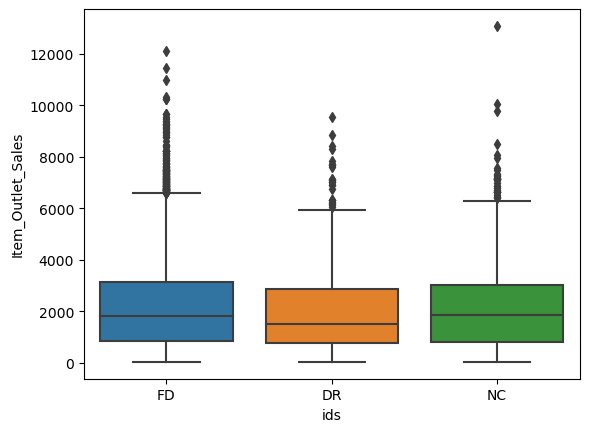

In [69]:
sns.boxplot(x = "ids", y = "Item_Outlet_Sales", data = combined)

In [70]:
# Item Fat Content will be redefined as "Non Edible" where ID==NC

combined.loc[combined.ids=="NC", "Item_Fat_Content"] = "Non Edible"

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

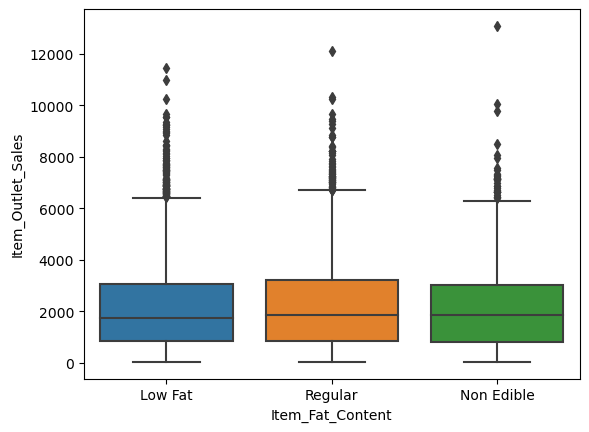

In [71]:
sns.boxplot(x = "Item_Fat_Content",
           y = "Item_Outlet_Sales", data = combined)

In [72]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR


In [73]:
# MRP_PER_UNIT
combined["price_per_unit"] = combined.Item_MRP/combined.Item_Weight

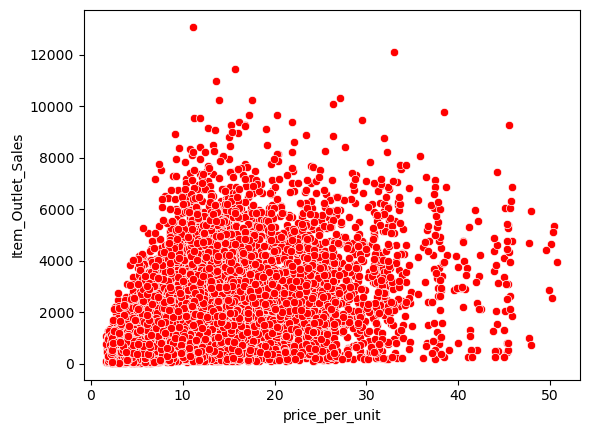

In [74]:
sns.scatterplot(combined.price_per_unit,
               combined.Item_Outlet_Sales, color = "red")
plt.show()

### Categorical Vars

* Binning - We bin the multiple Categories into lesser groups. For e.g. if I have 50 categories in the data, I can bin it in lets say 4 groups...

* Two Types of Categories in the Data - **Nominal** Variable and another is **Ordinal** Variable.

* While dealing with Nominal variable, we will convert the data into dummies. For the same, we will use **pd.get_dummies()** function to convert the data into Dummies.

Note: We have OneHotEncoder in sklearn library that achieves the same result.

* Now, when we apply pd.get_dummies function, we observe that the categories are converted into Dummy variables and it generates as many features as categories. 

* Multicollinearity in Cat Variables - It means all the categories appear similar in all the respects and therefore, there is a slight improvisation in pd.get_dummies() function. 

* What we do here -  We simply use a parameter in pd.get_dummies() which is known as **drop_first=True** which ensures that we get n-1 categories in the end. In other words, it will drop the very first category and the remaining ones are obtained. This is to ensure that we are able to eliminate the effect of duplicacy/high correlation between the categorical variables..

* Label Encoding - Label Encoder is initiated using sklearn.preprocessing library and the job of Label Encoder is to encode the Categories in a certain order. This order is comparable in nature where one category can be interpreted as a category greater than the ther one. 

Note: Generally the SKLEARN Label Encoder works in the Alphabetical Order and therefore, we can assign the label values basis our domain/business understanding.

In [75]:
# Item Type

combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [76]:
len(combined.Item_Type.unique())

16

In [77]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ids,price_per_unit
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,FD,26.861204


In [78]:
pd.get_dummies(combined.drop("Item_Identifier", axis = 1)).shape

(14204, 48)

In [79]:
combined.shape

(14204, 14)

In [80]:
pd.get_dummies(pd.DataFrame(combined.Item_Type), 
               drop_first = True).shape

(14204, 15)

In [81]:
# Item Type

combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [82]:
perishable = ["Dairy", "Meat", "Fruits and Vegetables",
             "Breakfast", "Breads", "Seafood"]

In [83]:
def banado(x):
    if x in perishable:
        return("Perishables")
    else:
        return("Non_Perishables")

In [84]:
combined["Banadiya"] =combined.Item_Type.apply(banado)

<AxesSubplot:xlabel='Banadiya', ylabel='Item_Outlet_Sales'>

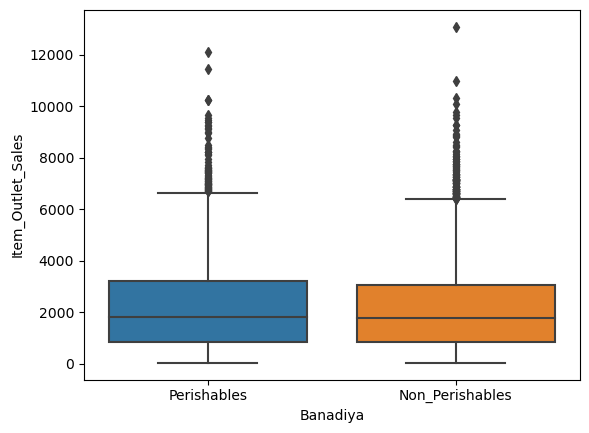

In [85]:
sns.boxplot(x = "Banadiya", y = "Item_Outlet_Sales",
               data = combined)

In [86]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ids,price_per_unit,Banadiya
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,26.861204,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,8.153581,Non_Perishables


In [87]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [88]:
# Top 2 Outlets - OUT027, OUT013

# Bottom 2 - OUT010, OUT019

top2 = ["OUT027", "OUT013"]
bottom2 = ["OUT010", "OUT019"]

def outlet_class(x):
    if x in top2:
        return("Mast")
    elif x in bottom2:
        return("Worst")
    else:
        return("Theek_thak")

In [89]:
combined["Outlets"]= combined.Outlet_Identifier.apply(outlet_class)

<AxesSubplot:xlabel='Outlets', ylabel='Item_Outlet_Sales'>

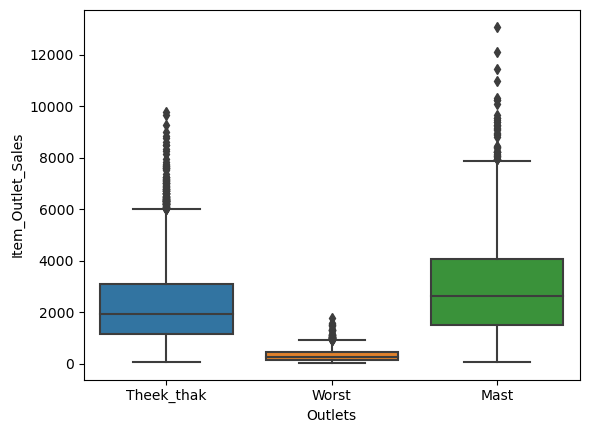

In [90]:
sns.boxplot(x = "Outlets", y = "Item_Outlet_Sales",
           data = combined)

In [91]:
# Drop the Unnecessary Variables
new = combined.drop(["Item_Identifier", "Outlet_Identifier",
              "Item_Type", "Outlet_Establishment_Year"], axis = 1)

In [92]:
new.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ids,price_per_unit,Banadiya,Outlets
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,26.861204,Perishables,Theek_thak
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,8.153581,Non_Perishables,Theek_thak


### Data PreProcessing Stage

* Scaling
* Transformation

Note: These things are applied after splitting the data back into Train and Test

This is to ensure that there is **NO Data Leakage** while building the Machine Learning Models.

This is the reason why the data is splitted back into Train and Test. The logic of Train and Test is that the machine learns pattern **only on Training Set** and the prediction happens on the Test Set.

This implies that the Test Set cannot be used for Training Purposes.

In [93]:
# Split the Data in Train and Test
train.shape, test.shape

((8523, 12), (5681, 11))

In [94]:
newtrain = new.loc[0:train.shape[0]-1]

In [95]:
newtest = new.loc[train.shape[0]:]

In [96]:
# Drop the Tgt variable from test set
newtest.drop("Item_Outlet_Sales", axis = 1, inplace =True)

### Standardization 

* Standardization, in simple words, is known as Scaling of the Data. We use Z Score Transformation for Scaling Purposes.

#### Why Scale the Data?

* We see that the dataset has different numerical columns with different magnitude. Compare item weight with visibility vs MRP and we can conclude that all the three Num Variables have different mean and standard deviation. 

* Hence, it makes sense to Scale the Numerical Variables and bring them on a Common Scale which that the mean would be 0 & Standard Deviation would be 1 for all the Num Variables.

* While Building the ML models, it would aid the machine in learning the pattern very quickly and hence, prediction would also happen very accrately.

##### Is it Compulsory to Scale Always...
No it is not a compulsion to scale the data however, many a times, after scaling, we observe that the model is able to do well in generating good predictions.



In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
# Create a Machine Instance
sc = StandardScaler()

In [99]:
# Fit the StandardScaler to scale the Training Set
num_vars = newtrain.select_dtypes(include = np.number)

In [100]:
cols = ['Item_Weight', 'Item_Visibility', 
        'Item_MRP', 'price_per_unit']

In [101]:
for i in cols:
    newtrain.loc[:, i] = \
    sc.fit_transform(pd.DataFrame(newtrain.loc[:, i]))

In [102]:
for i in cols:
    newtest.loc[:, i] = \
    sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [103]:
newtrain.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ids,price_per_unit,Banadiya,Outlets
0,-0.769246,Low Fat,-1.085324,1.747454,Medium,Tier 1,Supermarket Type1,3735.1380,FD,1.761951,Perishables,Theek_thak
1,-1.496813,Regular,-1.020645,-1.489023,Medium,Tier 3,Supermarket Type2,443.4228,DR,-0.569097,Non_Perishables,Theek_thak


### Normalization

* it is known as Min Max Scaler. The Formula for Min Max Scaler is (Xi-Min)/(Max-min)

* This scaling approach will convert all the columns in such a way that each col has min value 0 and max value 1.

* We apply this on that data that has either very less outliers or no outliers.

* It is applied on Images Dataset mostly...

In [104]:
# Library for MIn Max Scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [105]:
cols = ["Item_MRP", "Item_Visibility"]
for i in cols:
    train.loc[:, i] = \
    minmax.fit_transform(pd.DataFrame(train.loc[:, i]))

In [106]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.201382,0.465635,1997.831867,2181.288914
std,4.643456,0.157123,0.264327,8.371760,1706.499616
min,4.555000,0.000000,0.000000,1985.000000,33.290000
25%,8.773750,0.082187,0.265437,1987.000000,834.247400
50%,12.600000,0.164228,0.474209,1999.000000,1794.331000
75%,16.850000,0.288026,0.655156,2004.000000,3101.296400
max,21.350000,1.000000,1.000000,2009.000000,13086.964800


In [107]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ids,price_per_unit,Banadiya,Outlets
0,-0.769246,Low Fat,-1.085324,1.747454,Medium,Tier 1,Supermarket Type1,3735.1380,FD,1.761951,Perishables,Theek_thak
1,-1.496813,Regular,-1.020645,-1.489023,Medium,Tier 3,Supermarket Type2,443.4228,DR,-0.569097,Non_Perishables,Theek_thak
2,0.995858,Low Fat,-1.071055,0.010040,Medium,Tier 1,Supermarket Type1,2097.2700,FD,-0.576713,Perishables,Theek_thak
3,1.361794,Regular,-0.947851,0.660050,Small,Tier 3,Grocery Store,732.3800,FD,-0.403307,Perishables,Worst
4,-0.848890,Non Edible,-1.142787,-1.399220,High,Tier 3,Supermarket Type1,994.7052,NC,-0.833516,Non_Perishables,Mast


### Encoding Cat Variables

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [109]:
le.fit_transform(newtrain.Outlet_Size)

array([1, 1, 1, ..., 2, 1, 2])

In [110]:
newtrain.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [111]:
size = {"Small":1, "Medium":2, "High":3}

In [112]:
newtrain["Outlet_Size"] =newtrain.Outlet_Size.map(size)
newtest["Outlet_Size"] =newtest.Outlet_Size.map(size)

In [113]:
# Apply One Hot Encoding on Remaining Vars

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [114]:
dummytrain.shape, dummytest.shape

((8523, 18), (5681, 17))